# The Gender Gap In College Degrees

This notebook is an excercise from [a dataquest.io course - Storytelling Through Data Visualization](https://www.dataquest.io/course/storytelling-data-visualization). Data are also downloaded from there. 

The aim of the notebook is to find out if there was a gender gap in college degrees in years 1970 to 2012 and visualize the findings using Matplotlib and Seaborn Python Libraries.

## Data

The data set is broken up into 17 categories of degrees, with each column as a separate category.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv', index_col='Year')
women_degrees.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


## Matplotlib Grid

This visualization is the execution of the dataquest.io excercise.

In [7]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

# these lists are ordered in descending order by the percentage of degrees awarded to women
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

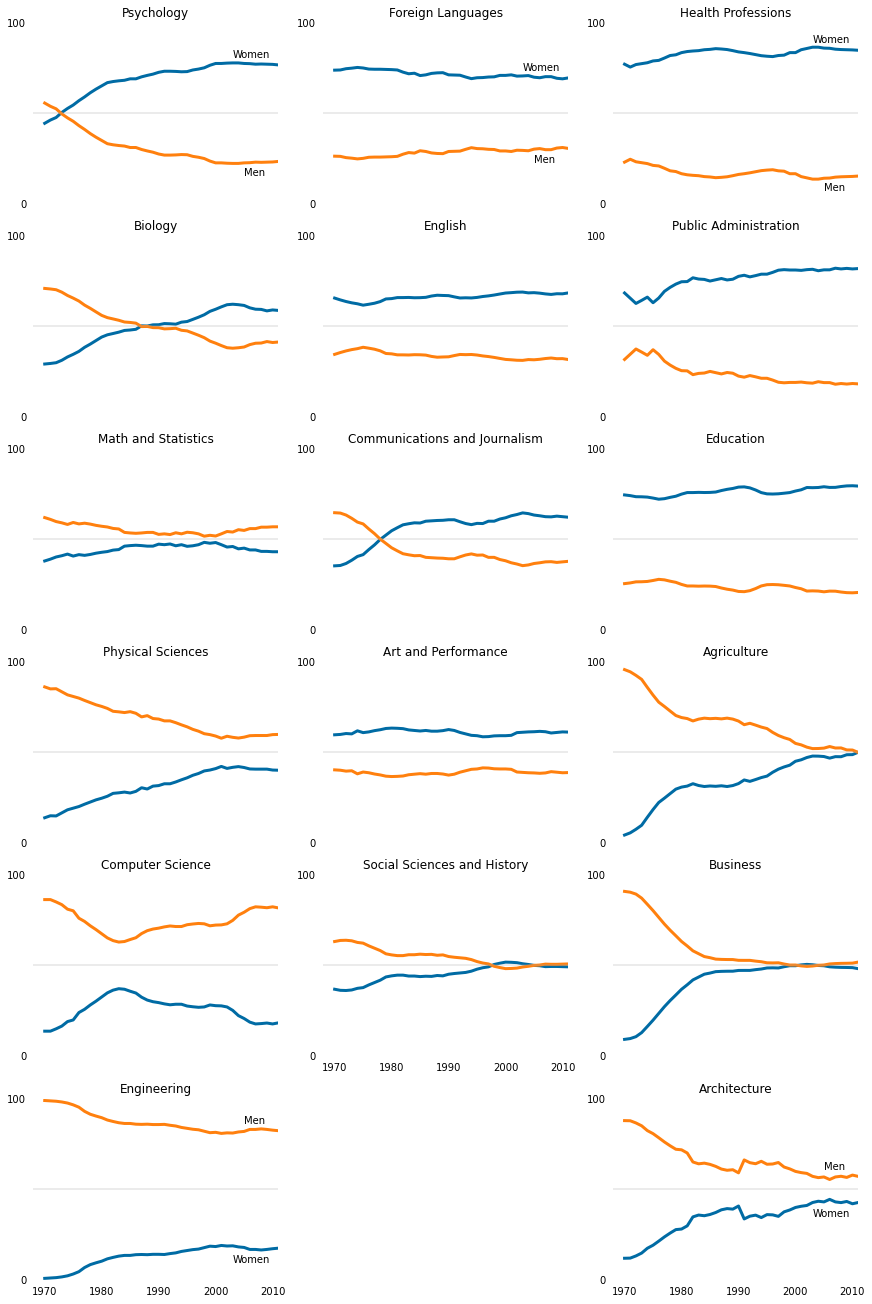

In [53]:
def populate_plot(ax, degree_data, show_labels=False):
    ax.plot(women_degrees.index, degree_data, c=cb_dark_blue, label='Women', linewidth=3)
    male_data = 100 - degree_data
    ax.plot(women_degrees.index, male_data, c=cb_orange, label='Men', linewidth=3)
    
    if show_labels:
        last_male = male_data[2011]
        last_female = degree_data[2011]
        if last_male > last_female:
            ax.text(2005, last_male + 4, 'Men')
            ax.text(2003, last_female - 8, 'Women')
        else:
            ax.text(2003, last_female + 4, 'Women')
            ax.text(2005, last_male - 8, 'Men')
    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_yticks([0,100])
    ax.set_title(degree_data.name)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    # show years in the bottom charts
    if degree_data.name in ['Engineering', 'Social Sciences and History', 'Architecture']:
        ax.tick_params(labelbottom='on')



columns = [stem_cats, lib_arts_cats, other_cats]
fig1, f1_axes = plt.subplots(ncols=3, nrows=6, sharex='col', constrained_layout=True, figsize=(12, 18))

for col_index, col in enumerate(columns):
    for row_index in range(6):
        ax = f1_axes[row_index][col_index]
        
        # skipping the empty bottom middle chart
        if (col_index == 1) and (row_index == 5):
            fig1.delaxes(ax)
            continue
        
        degree = columns[col_index][row_index]
        degree_data = women_degrees[degree]
        show_labels = (row_index == 0) or (row_index == 5)
        populate_plot(ax, degree_data, show_labels)
        
# plt.show()
plt.savefig("gender_degrees.png")

Even though this is an expected result for the exercise, I don't think it is good enough. Some issues:
- Because each plot is not separated from another the labels can get easily confusing in the middle. Is Education graph to the top or to the bottom the education label? The reason for this was to increase data-ink ratio (as per Tufte), but I think leaving at least faint grids would be useful. Alternatively adding more spacing between the graphs could help.
- The `[0, 100]` range can be removed from the middle column, it clutter the view appearing so many times. And on the right column it should be either removed entirely or moved to the right
- The same data are represented via 2 lines intead of just one (each `Men` line is just `100 - Women`)

## Seaborn 

Here is a matplotlib wrapper library and my idea of how to visualize the same data.